In [1]:
import tensorflow as tf
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('./ai_model/my_model.h5')

# Show the model architecture
new_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 48, 48, 32)   864         ['input_3[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 48, 48, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 48, 48, 32)   0           ['bn_Conv1[0][0]']               
                                                                                            

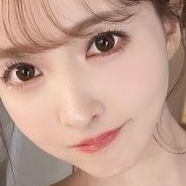

In [4]:
import os
import glob
import cv2
from PIL import Image
import dlib

detector = dlib.get_frontal_face_detector()

# 各女優のディレクトリのリストを取得
dir_list = os.listdir('new_data')

for i, dir_name in enumerate(dir_list):
    if not os.path.exists(os.path.join('new_data_cropped', dir_name)):
        os.mkdir(os.path.join('new_data_cropped', dir_name))
    image_files = glob.glob(os.path.join('new_data', dir_name, "*.jpg"))

    for j, image_file in enumerate(image_files):
        img = cv2.imread(image_file)
        dets = detector(img, 1)
        open_img = Image.open(image_file)

        for k, d in enumerate(dets):
            # サイズが80以下の画像はスキップする
            if d.right()-d.left() < 80 or d.bottom()-d.top() < 80:
                continue

            image_file = image_file.replace('new_data', 'new_data_cropped')
            # １つの画像に復数の顔があると出力のファイル名がかぶるので変更
            output_file = image_file.replace('.jpg', '_'+str(k)+'.jpg')

            cropped_img = open_img.crop((d.left(), d.top(), d.right(), d.bottom()))
            cropped_img.resize((96,96)).save(output_file, 'JPEG', quality=100, optimize=True)

cropped_img         


---
### prediction

In [5]:
classes = ["横宮七海","三上悠亞","松本いちか","東條なつ","白桃はな","河北彩花","楪カレン","木下ひまり","篠田優","小花のん",
"新井リマ","沙月恵奈","彌生美月","涼森玲夢","櫻空桃","有栖花あか","石川澪","桃園怜奈","伊藤舞雪","田中ねね",
"神宮寺奈緒","倉本すみれ","鷲尾めい","天使萌","安齋らら","天音まひな","二階堂夢","Julia","美谷朱里","姫咲はな",
"藤森里穂","明里紬","紗倉真奈","山手梨愛","戶田真琴","愛弓りょう","美乃すずめ","七ツ森りり","乙アリス","架乃由羅",
"石原希望","八木奈々","桃乃木香奈","八掛うみ","波多野結衣","吉根柚莉愛","柏木こなつ","夏希栗","葵司","松下紗榮子",
"天川空","本庄鈴","小湊よつ葉","羽咲みはる","希島愛理","奧田咲","加美杏奈","明日見未来","黑川堇","橋本有菜",
"沙月恵奈","夢乃愛華","古川伊織","辻井穗乃果","森沢かな","山岸逢花","相澤南","水卜櫻","小倉由菜","瀬名ひかり",
"森日向子","Minamo","梓ヒカリ","小野六花","花狩まい","高瀬りな","希咲アリス","初川南","推川悠里","椿りか",
"結城りの","新村晶","楓ふうあ","四宮ありす","月乃露娜","鈴木真夕","稻場流花","河合明日菜","楓可憐","川上奈奈美",
"望月絢香","宮下玲奈","中山文香","庵ひめか","白石茉莉奈","有岡みう","工藤ララ","美波もも","南乃そら","深田詠美"]
img_ndarray = tf.keras.utils.img_to_array(cropped_img)
resized_image = cv2.resize(img_ndarray, (96, 96), interpolation=cv2.INTER_AREA)
resized_image = resized_image.reshape(-1, 96, 96, 3)
print(resized_image.shape)

predict = new_model([resized_image], training=False)

tensor = tf.constant(predict)

max_index = tf.argmax(tensor, axis=1)[0].numpy()

# Get the shape of the tensor
num_rows, num_cols = tensor.shape

sorted_indices = []

for i in sorted(range(num_cols), key=lambda x: abs(x-max_index), reverse=False):
    index = (0, i)
    sorted_indices.append(i)

# Get the probabilities of the sorted indices using NumPy
# probabilities = np.take(predict.numpy(), sorted_indices)

# Iterate over the sorted indices and print the corresponding class name and probability
for sorted_index in sorted_indices:
    class_name = classes[sorted_index]
    probability = tf.nn.softmax(predict, axis=-1).numpy()[0][sorted_index]
    # probability = probabilities[sorted_index]
    print(f"{class_name}: probs {probability}")

# argmax
# print(f"{classes[np.argmax(predict)]}: probs {tf.nn.softmax(predict, axis=-1).numpy()[0][np.argmax(predict)]}")


(1, 96, 96, 3)
松下紗榮子: probs 0.012150014750659466
葵司: probs 0.009907401166856289
天川空: probs 0.010542905889451504
夏希栗: probs 0.009900819510221481
本庄鈴: probs 0.010437448509037495
柏木こなつ: probs 0.009895741939544678
小湊よつ葉: probs 0.009918957948684692
吉根柚莉愛: probs 0.009900568053126335
羽咲みはる: probs 0.010184288024902344
波多野結衣: probs 0.009911293163895607
希島愛理: probs 0.009969057515263557
八掛うみ: probs 0.009915760718286037
奧田咲: probs 0.009898832067847252
桃乃木香奈: probs 0.009910078719258308
加美杏奈: probs 0.009907553903758526
八木奈々: probs 0.01080600917339325
明日見未来: probs 0.009895605966448784
石原希望: probs 0.009895685128867626
黑川堇: probs 0.00989763904362917
架乃由羅: probs 0.009895327500998974
橋本有菜: probs 0.009896685369312763
乙アリス: probs 0.009901201352477074
沙月恵奈: probs 0.009978407993912697
七ツ森りり: probs 0.009907479397952557
夢乃愛華: probs 0.009909053333103657
美乃すずめ: probs 0.009895417839288712
古川伊織: probs 0.010861697606742382
愛弓りょう: probs 0.009904301725327969
辻井穗乃果: probs 0.009973344393074512
戶田真琴: probs 0.00991797912